<h1 align=center> Étude 1 : de prédiction de loyer d'appartements </h1>

<h2 align=center> OpenClassrooms - CentraleSupélec Certificate</h2>
<h3 align=center>Jean Martial Tagro </h3>

---

##### Objectif 1er

Le but de ce travail est de prédire le loyer d'un appartemant, connaissant sa surface. On considère donc dans un premier temps un vecteur prédicteurs <b>unidimensionnel</b> c'est-à-dire qu'on a affaire à une seule <i>feature</i> en l'occurence la surface.

In [2]:
# importation des librairies necessaires
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# importation des donnees labellisés : Surfaces, Loyers
house_data = pd.read_csv('house.csv')

In [4]:
#1er check des données
house_data[:10]

,loyer,surface
0,1330,37
1,1400,32
2,904,26
3,955,30
4,2545,70
5,970,24
6,1560,41
7,1960,67
8,2000,63
9,2600,70


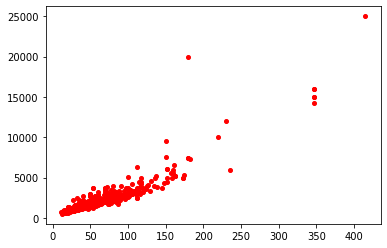

In [5]:
# 1er check du nuage des points (x,y) d'observation
plt.plot(house_data['surface'], house_data['loyer'], 'ro', markersize=4)

plt.show() # pour afficher que le graphique

Clairement, d'après la visualisation, on peut se dire que le montant du loyer dépend de manière linéaire de la surface du logement. On peut donc émettre une hypothèse de modélisation qui est que le phénomène possède la forme d'une droite. 

Aussi, on peut voir que lorsque la surface devient un peu trop grande, les données semblent devenir moins modélisables facilement, il y a plus de variabilité. On va considérer pour l'instant résoudre le problème de prédiction pour les loyers inférieurs à 10,000€, afin de conserver une robustesse du modèle à ces données plutôt anormales, qui correspondent peut-être à un autre modèle distinct ou à un traitement comme outliers.

In [6]:
# on ne garde que les observations dons le loyer est inférieur à 10000
house_data = house_data[house_data['loyer'] < 10000]
#house_data.head()

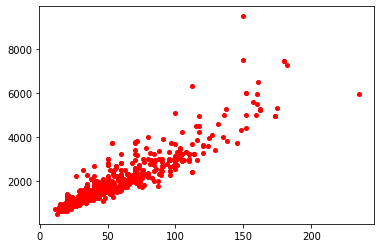

In [7]:
# On observe ...
plt.plot(house_data['surface'], house_data['loyer'], 'ro', markersize=4)

plt.show()

Il y a déjà moins de dispersion globalement. 
Notre objectif ici est de trouver le modèle statistique qui fitte le mieux ce phénomène.

Rappel : <b>données = modèle sous-jacent + bruit irréductible</b>

On peut déjà poser la contrainte de forme (modèle sous-jacent) : une regression linéaire est adéquate.

Cette regression est définie ici par : y = a.x + b

Il faut trouver le couple de paramètres θ = (a,b) qui fitte au mieux les points d'observation, soit :
- en minimisant le risque empirique, somme des distances euclidiennes (fonction loss)
- en maximisant la fonction de vraisemblance

On choisit la 1ere solution.

![title](Images/im1.png)

## On montre que : L'estimateur des moindres carrés

![title](Images/im2.png)

### Détails de la solution

On cherche à minimiser la fonction E en fonction de theta. La fonction est convexe (c’est une somme de carrés), donc elle possède un optimum global (en l’occurrence un minimum), qui se trouve à l’endroit où la dérivée première en theta est nulle. Pour les détails de la démonstration, http://eli.thegreenplace.net/2014/derivation-of-the-normal-equation-for-linear-regression.

Mais on peut aussi utiliser un algorithme appelé <strong>descente de gradient</strong> pour trouver une approximation de la solution. C'est en particulier utile lorsque l'on a beaucoup de données d'exemple, car c'est assez long pour un ordinateur de calculer la solution exacte ci-dessus (on calcule un inverse de matrice, ce qui n'est pas gratuit en temps de calcul !).

In [8]:
X = np.matrix([np.ones(house_data.shape[0]), house_data['surface'].values]).T
print(X)

[[ 1. 37.]
 [ 1. 32.]
 [ 1. 26.]
 ...
 [ 1. 70.]
 [ 1. 42.]
 [ 1. 44.]]


In [9]:
# On décompose le dataset et on le transforme en matrices pour pouvoir effectuer notre calcul
X = np.matrix([np.ones(house_data.shape[0]), house_data['surface'].values]).T
y = np.matrix(house_data['loyer']).T

# On effectue le calcul exact du paramètre theta
theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

print(theta)

[[266.45460292]
 [ 30.66119596]]


Ainsi modèle final : 
#### y = 30,7 x surface + 266,4

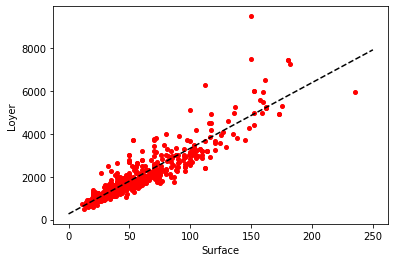

In [10]:
# Representation
plt.xlabel('Surface')
plt.ylabel('Loyer')

plt.plot(house_data['surface'], house_data['loyer'], 'ro', markersize=4)

# On affiche la droite entre 0 et 250
plt.plot([0,250], [theta.item(0),theta.item(0) + 250 * theta.item(1)], linestyle='--', c='#000000')
# En o , on prend l'ordonné à l'origine et en 250, on remplace dans la formule.
plt.show()

### Prédiction sur 35 m2

In [11]:
print(theta.item(0) + 35 * theta.item(1))

1339.5964615602256


On vient ici de décomposer l’entraînement de la régression linéaire. En réalité, vous vous doutez bien que cette régression est déjà implémentée dans le package scikit-learn. On peut l'utiliser directement de la manière suivante :

In [14]:
#from sklearn import linear_model
#regr = linear_model.LinearRegression()
#regr.fit(X, y)
#regr.predict(<des données de test>)

### Sampling ou Echantillonage
Cette phase consiste à selectionner une partie des données (si trop volumineuse pour éviter de longs temps de calculs inutiles) pour faire la modélisation; avant même de cinder les données en training/testing.

ATTENTION à introduire du bias. Les données sélectionnées doivent être bien distribuées.

In [122]:
house_data.size

1072

In [123]:
#house_data

In [124]:
sample = np.random.randint(house_data.shape[0], size=int(house_data.shape[0]*0.1))
sample

array([142, 479, 120, 348,  68, 531,  52, 241, 436, 222, 114, 426, 275,
        10, 286, 534,  87, 102, 448, 469, 513, 230, 451, 129,  15,  28,
       442, 385, 128, 251, 227, 307, 168, 336, 145,  68, 197, 260, 298,
       252, 313, 337, 377, 109, 368, 373, 326, 411, 290, 274, 453, 523,
       243])

In [126]:
#sampled_data = house_data.loc[sample]
#print(sampled_data.shape)
#sampled_data.head()